### Taking videos when a person is in the frame

In [4]:
import cv2
import time
import datetime

cap = cv2.VideoCapture(0)

face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
body_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_fullbody.xml")

detection = False
detection_stopped_time = None
timer_started = False
SECONDS_TO_RECORD_AFTER_DETECTION = 5

frame_size = (int(cap.get(3)), int(cap.get(4)))
fourcc = cv2.VideoWriter_fourcc(*"mp4v")

while True:
    _, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    bodies = face_cascade.detectMultiScale(gray, 1.3, 5)

    if len(faces) + len(bodies) > 0:
        if detection:
            timer_started = False
        else:
            detection = True
            current_time = datetime.datetime.now().strftime("%d-%m-%Y-%H-%M-%S")
            out = cv2.VideoWriter(
                f"{current_time}.mp4", fourcc, 20, frame_size)
            print("Started Recording!")
    elif detection:
        if timer_started:
            if time.time() - detection_stopped_time >= SECONDS_TO_RECORD_AFTER_DETECTION:
                detection = False
                timer_started = False
                out.release()
                print('Stop Recording!')
        else:
            timer_started = True
            detection_stopped_time = time.time()

    if detection:
        out.write(frame)

    for (x, y, width, height) in faces:
       cv2.rectangle(frame, (x, y), (x + width, y + height), (255, 0, 0), 3)

    cv2.imshow("Camera", frame)

    if cv2.waitKey(1) == ord('q'):
        break

out.release()
cap.release()
cv2.destroyAllWindows()




### In my case the recording, doesn't get stored in the right directory so I need to move it around. This might not be the case for you

In [39]:
from os import listdir
import os

file = sorted([x for x in os.listdir() if x[-4:] == '.mp4'])[0]
file[:-4]

'17-09-2022-22-37-54'

In [77]:
import shutil
files = [x for x in os.listdir('C:\\Users\\sskr2\\Documents\\personal-projects') if x[-4:] == '.mp4']
files

['17-09-2022-22-57-01.mp4']

In [ ]:
for x in files:
    shutil.move(f'C:\\Users\\sskr2\\Documents\\personal-projects\\{x}', f'C:\\Users\\sskr2\\Documents\\personal-projects\\security\\{x}')

### trying to figure it is me or someone else

In [2]:
import cv2
import os 

vid = cv2.VideoCapture('17-09-2022-22-37-54.mp4')
currentframe = 0

while True:
    success, frame = vid.read()
    #cv2.imshow('Output', frame)
    cv2.imwrite('frame' + str(currentframe) + '.jpg', frame)
    break

vid.release()
cv2.destroyAllWindows()


### sending a notfication to my phone using push bullet api

In [28]:
from pushbullet import Pushbullet

file = 'api_key.txt'
auth_token = '<TOKEN>'
 
with open(file, mode = 'r') as f:
    text = f.read()
    auth_token = str(text[20:54])

message = f'Camera has picked up suspicious activity at {file[:-4]}. Please Review Google drive' 
pb = Pushbullet(auth_token)
push = pb.push_note('NOTE: ',message)

Notification:
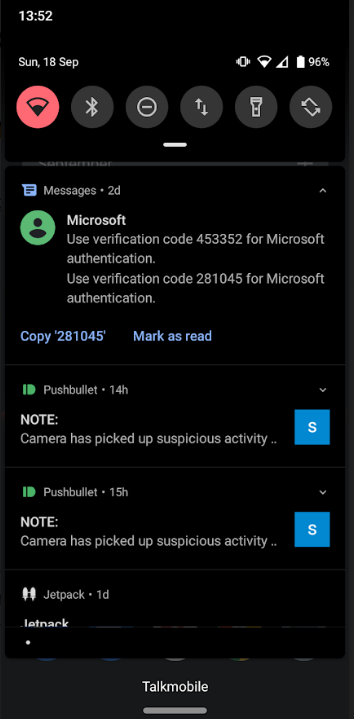

### Sending my recordings to my personal google drive so that I can view it where ever I want

In [1]:
from Google import Create_Service
from googleapiclient.http import MediaFileUpload

client_secret_file = 'client_secret_791408690714-fbqbdc7nak2ale19djr5dlcrrqg0mu3l.apps.googleusercontent.com.json'
api_name = 'drive'
api_version = 'v3'
scope = ['https://www.googleapis.com/auth/drive']

service = Create_Service(client_secret_file, api_name, api_version, scope)

folder_id = '1530yVuGA6cac2jojs2m4Y6tYJ0Qky4LU'

file_names = ['17-09-2022-22-37-54.mp4']

for x in file_names:
    file_metadata = {
        'name' : x,
        'parents': [folder_id]
    }
    media = MediaFileUpload(x, mimetype ='video/mp4')
    service.files().create(
        body = file_metadata,
        media_body = media,
        fields = 'id'
    ).execute()




client_secret_791408690714-fbqbdc7nak2ale19djr5dlcrrqg0mu3l.apps.googleusercontent.com.json-drive-v3-(['https://www.googleapis.com/auth/drive'],)
['https://www.googleapis.com/auth/drive']
drive service created successfully


output
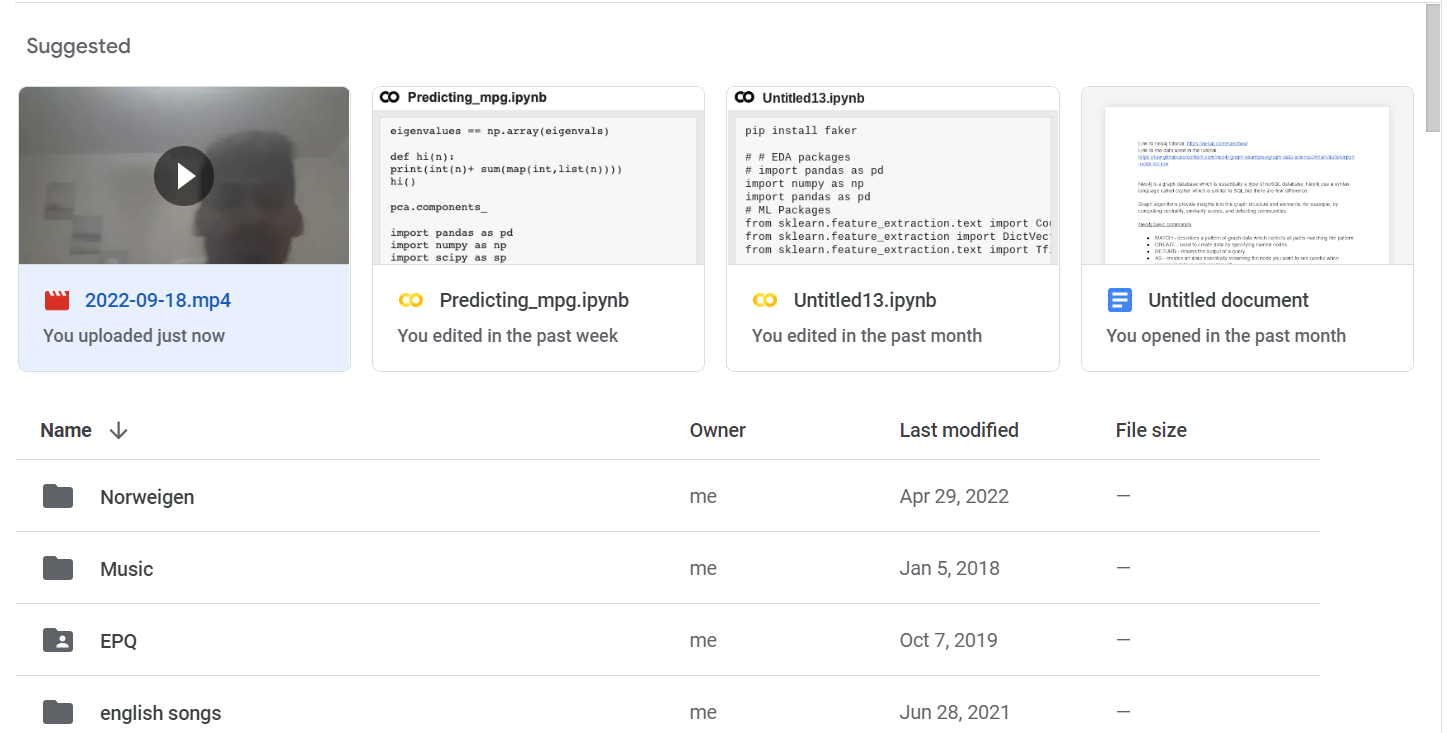